In [1]:
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [4]:
list_files2_new = ["/cluster/work/users/a2021/input/OceanNET_OAE/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc"]
dset_case2_new = xr.open_dataset(list_files2_new[0], decode_times=False)
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2_new = dset_case2_new.assign_coords(time=monthly_dates)
#dset_case2_new.to_netcdf('/cluster/work/users/a2021/input/OceanNET/test.nc', mode='w', format='NETCDF4')


FileNotFoundError: [Errno 2] No such file or directory: b'/cluster/work/users/a2021/input/OceanNET_OAE/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc'

##writing out the anthro emission for a particular month for a particular year to an nc file to use in the CCS code

<xarray.DataArray 'CO2_flux' ()>
array(0.00040587, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(0.00011813, dtype=float32)


Text(0.5, 1.0, '2029-2034')

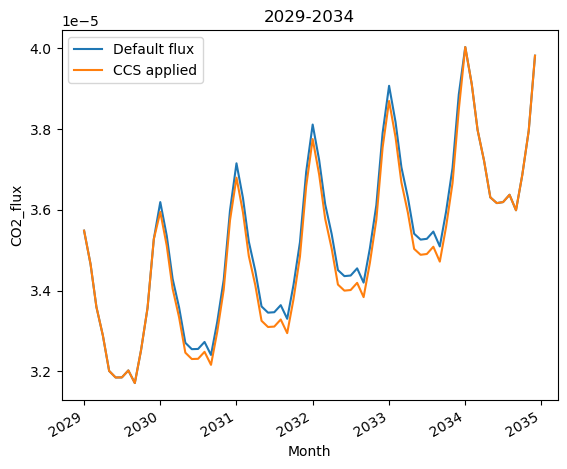

In [7]:
list_files2 = ["/cluster/shared/noresm/inputdata/atm/cam/ggas/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c20220809.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
#dset_case2['CO2_flux'].sel(time='2030').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2030_1.9x2.5_remap_c20231005.nc")


dset_case2['CO2_flux'].sel(time=slice('2029', '2034')).sum(['lat','lon']).plot(label='Default flux')
plt.xlabel('Month')
plt.legend()
print(dset_case2['CO2_flux'].sel(time='2030').sum())
#output_dir = "/cluster/work/users/a2021/input/ONETs/"


#list_files3 = ["/cluster/work/users/a2021/input/OceanNET1/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc"]
list_files3 = ["/cluster/work/users/a2021/input/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011_OAE.nc"]

dset_case3 = xr.open_dataset(list_files3[0], decode_times=False)
dset_case3 = dset_case3.assign_coords(time=monthly_dates)


#dset_case3['CO2_flux'].sel(time=slice('2029', '2034')).sum(['lat','lon']).plot(label='CCS applied')
plt.xlabel('Month')
plt.legend()
plt.title('2029-2034')
print(dset_case3['CO2_flux'].sel(time='2059').sum())
dset_case3['CO2_flux']
dset_case2_new['CO2_flux'].sel(time=slice('2029', '2034')).sum(['lat','lon']).plot(label='CCS applied')
plt.xlabel('Month')
plt.legend()
plt.title('2029-2034')
#print(dset_case3['CO2_flux'].sel(time='2059').sum())
#dset_case3['CO2_flux']

## Replace the modified flux of 2058 and 2059 back to the original value

In [107]:
list_files4 = ["/cluster/shared/noresm/inputdata/atm/cam/ggas/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c20220809.nc"]
#list_files3 = ["/cluster/work/users/a2021/input/OceanNET/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011_orig.nc"]

dset_case4 = xr.open_dataset(list_files4[0], decode_times=False)

orig_time=dset_case4.time
orig_time_bnds=dset_case4.time_bnds

# Assign monthly dates to the datasets

dset_case4 = dset_case4.assign_coords(time=monthly_dates)


# Replace 'CO2_flux' values in dset_case2 with values from dset_case3 for the specified time range
replacement_range = slice('2030', '2058')
dset_case4['CO2_flux'].loc[dict(time=replacement_range)] = dset_case3['CO2_flux'].loc[dict(time=replacement_range)].values

# Write the modified dset_case2 to a new netCDF file
output_file = "/cluster/work/users/a2021/input/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc"
dset_case4['time']=orig_time
dset_case4['time_bnds']=orig_time_bnds

#dset_case2.to_netcdf(output_file, mode='w', format='NETCDF4', encoding=encoding)
#dset_case4.to_netcdf(output_file, mode='w', format='NETCDF4')

In [114]:
#print(dset_case4['time'].attrs)
dset_case4['CO2_flux'].sel(time=slice('2050', '2061')).sum(['lat','lon'])
#print(orig_time)


<xarray.DataArray 'CO2_flux' (time: 0)>
array([], dtype=float32)
Coordinates:
  * time     (time) float64

<xarray.DataArray 'CO2_flux' ()>
array(9.5991425e-05, dtype=float32)


<xarray.DataArray 'CO2_flux' (time: 1056, lat: 96, lon: 144)>
[14598144 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2101-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     CO2 Anthropogenic Emissions
    units:         kg m-2 s-1
    cell_methods:  time: mean

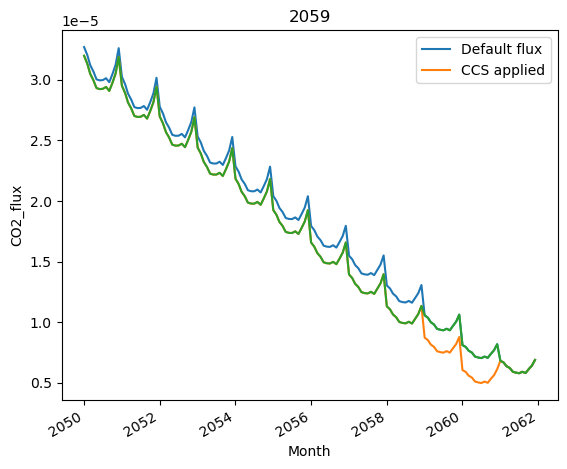

In [116]:
dset_case2['CO2_flux'].sel(time=slice('2050', '2061')).sum(['lat','lon']).plot(label='Default flux')
dset_case3['CO2_flux'].sel(time=slice('2050', '2061')).sum(['lat','lon']).plot(label='CCS applied')
#dset_case4['CO2_flux'].sel(time=slice('2050', '2061')).sum(['lat','lon']).plot(label='CCS applied_new')
dset_case2_new['CO2_flux'].sel(time=slice('2050', '2061')).sum(['lat','lon']).plot(label='new')

#dset_case3['CO2_flux'].sel(time='2060').sum(['lat','lon']).plot(label='CCS applied')
plt.xlabel('Month')
plt.legend()
plt.title('2059')
print(dset_case3['CO2_flux'].sel(time='2059').sum())
dset_case3['CO2_flux']

In [54]:
dset_case4.time_bnds

<xarray.DataArray 'time_bnds' (time: 1056, bound: 2)>
[2112 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2101-12-01
Dimensions without coordinates: bound
Attributes:
    calendar:   365_day
    long_name:  Bounds for $time coordinate
    units:      days since 1750-01-01 00:00:00

In [55]:
dset_case2.time_bnds

<xarray.DataArray 'time_bnds' (time: 1056, bound: 2)>
[2112 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2101-12-01
Dimensions without coordinates: bound
Attributes:
    calendar:   365_day
    long_name:  Bounds for $time coordinate
    units:      days since 1750-01-01 00:00:00

<xarray.DataArray 'CO2_flux' ()>
array(0.00048841, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(0.00048841, dtype=float32)


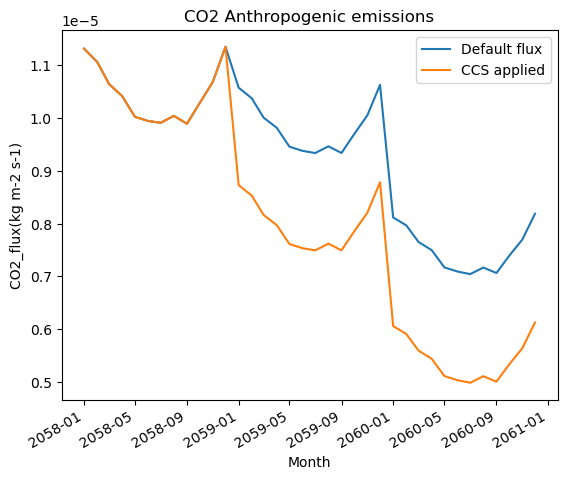

In [31]:
Default_flux=(dset_case2['CO2_flux'].sum(['lat','lon'])).sel(time=slice('2058', '2060'))
Default_flux.plot(label='Default flux')
plt.xlabel('Month')
plt.legend()
print(dset_case2['CO2_flux'].sel(time='2038').sum())

#list_files3 = ["/cluster/work/users/a2021/input/OceanNET/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc"]
#dset_case3 = xr.open_dataset(list_files3[0], decode_times=False)
#dset_case3 = dset_case3.assign_coords(time=monthly_dates)
CCS_applied=(dset_case3['CO2_flux'].sum(['lat','lon'])).sel(time=slice('2058', '2060'))
CCS_applied.plot(label='CCS applied')
plt.xlabel('Month')
plt.ylabel('CO2_flux(kg m-2 s-1)')
plt.title('CO2 Anthropogenic emissions')
plt.legend()
print(dset_case3['CO2_flux'].sel(time='2038').sum())

<xarray.DataArray 'CO2_flux' ()>
array(0.00049415, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(0.00048841, dtype=float32)


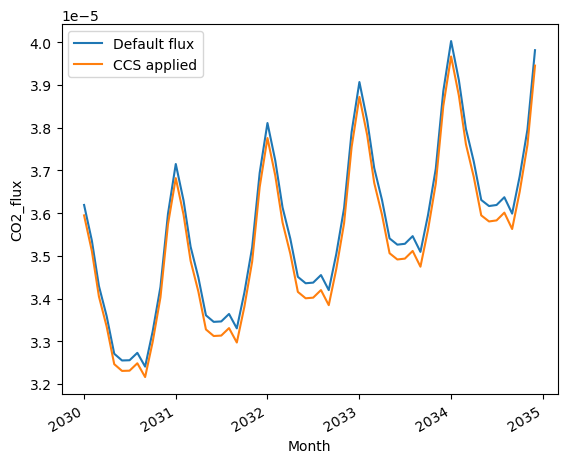

In [10]:

Default_flux=(dset_case2['CO2_flux'].sum(['lat','lon'])).sel(time=slice('2030', '2034'))
Default_flux.plot(label='Default flux')
plt.xlabel('Month')
plt.legend()
print(dset_case2['CO2_flux'].sel(time='2038').sum())

list_files3 = ["/cluster/work/users/a2021/input/OceanNET/CO2_ssp534CCS_2014-2100_1.9x2.5_remap_c20231011.nc"]
dset_case3 = xr.open_dataset(list_files3[0], decode_times=False)
dset_case3 = dset_case3.assign_coords(time=monthly_dates)
CCS_applied=(dset_case3['CO2_flux'].sum(['lat','lon'])).sel(time=slice('2030', '2034'))
CCS_applied.plot(label='CCS applied')
plt.xlabel('Month')
plt.legend()
print(dset_case3['CO2_flux'].sel(time='2038').sum())

In [5]:
dset_case3['CO2_flux']

<xarray.DataArray 'CO2_flux' (time: 1056, lat: 96, lon: 144)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [9.613774e-12, 6.215103e-12, ..., 0.000000e+00, 4.588032e-12],
        [5.466909e-11, 6.419348e-11, ..., 0.000000e+00, 4.471178e-12]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [9.583121e-12, 6.215103e-12, ..., 0.000000e+00, 4.557379e-12],
        [5.466909e-11, 6.419348e-11, ..., 0.000000e+00, 4.471178e-12]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [3.124702e-12, 1.693836e-12, ..., 0.000000e+00, 1.425064e-12],
        [6.806906e-11, 9.004476e-11, ..., 0.000000e+00, 2.737843e-12]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [3.120390e-12, 1.693836e-12, ..., 0.000000e+00, 1.420752e-12],
        [6.806906e-11, 9.004476e-11, ..., 0.000000e+00, 2.737843e-12]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2101-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     CO2 Anthropogenic Emissions
    units:         kg m-2 s-1
    cell_methods:  time: mean

In [14]:
#dset_case2_new=dset_case2['CO2_flux'].resample(time='AS').sum(dim='time')
#dset_case3_new=dset_case3['CO2_flux'].resample(time='AS').sum(dim='time')
dset_case2.resample(time='AS').sum(dim='time')

TypeError: __init__() got an unexpected keyword argument 'base'

In [ ]:
print(dset_case2['CO2_flux'].sel(time='2080').sum())
print(dset_case2['CO2_flux'].sel(time='2081').sum())
print(dset_case2['CO2_flux'].sel(time='2080-01').sum())
print(dset_case2['CO2_flux'].sel(time='2081-01').sum())
dset_case2['CO2_flux'].sel(time='2080-01')
dset_case2['CO2_flux']

##checking the ones from CCS code calculation

In [7]:
list_files2 = ["/cluster/work/users/a2021/input/BECCSy/CO2_ssp534CCS_2014-2100_monthly_1.9x2.5_remap_c20231005.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
print(dset_case2['CO2_flux'].sel(time='2080').sum())
print(dset_case2['CO2_flux'].sel(time='2081').sum())
print(dset_case2['CO2_flux'].sel(time='2080-01').sum())
print(dset_case2['CO2_flux'].sel(time='2081-01').sum())

<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-0.00011919, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-9.547813e-06, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-9.736563e-06, dtype=float32)


In [47]:
list_files9 = ["/cluster/work/users/a2021/input/BECCSy_h1/CO2_ssp534_2080_monthly_1.9x2.5_remap_c20231109.nc"] 
dset_case9 = xr.open_dataset(list_files9[0], decode_times=False)
print(dset_case9.CO2_flux.sum())
print(dset_case9.CO2_flux.isel(time=0).sum())
print(dset_case9['CO2_flux'].isel(time=1).sum())


<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-9.547813e-06, dtype=float32)
Coordinates:
    time     int64 0
<xarray.DataArray 'CO2_flux' ()>
array(-9.573538e-06, dtype=float32)
Coordinates:
    time     int64 31


In [8]:
list_files2 = ["/cluster/work/users/a2021/input/BECCSy_h1/CO2_ssp534CCS_2014-2100_monthly_1.9x2.5_remap_c20231005.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
print(dset_case2['CO2_flux'].sel(time='2080').sum())
print(dset_case2['CO2_flux'].sel(time='2081').sum())
print(dset_case2['CO2_flux'].sel(time='2080-01').sum())
print(dset_case2['CO2_flux'].sel(time='2081-01').sum())

<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-0.00011919, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-9.547813e-06, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-9.736563e-06, dtype=float32)


In [27]:
list_files7 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_0509_sugarcane/lnd/hist/pp_h1/2081/NSSP534frc2esm_f19_tn14_0509_sugarcane_2080_CCS.nc"]
dset_case7 = xr.open_dataset(list_files7[0], decode_times=False)
print(dset_case7.CO2_flux.sum())


list_files2 = ["/cluster/work/users/a2021/input/BECCSy_h1/CO2_ssp534_2080_Jan_1.9x2.5_remap_c20231005.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
print(dset_case2['CO2_flux'].sum())
#result = dset_case7['CO2_flux'] - dset_case2['CO2_flux']
# Check for duplicate time values in dset_case7


dset_case2['CO2_flux'] =dset_case2['CO2_flux'].isel(time=0)
dset_case2['CO2_flux'].sum()

<xarray.DataArray 'CO2_flux' ()>
array(4327661.70224017)
<xarray.DataArray 'CO2_flux' ()>
array(-9.547813e-06, dtype=float32)


<xarray.DataArray 'CO2_flux' ()>
array(-9.547813e-06, dtype=float32)

In [26]:
result = dset_case7['CO2_flux'].sel(time=0) - (dset_case2['CO2_flux'])
result.sum()

<xarray.DataArray 'CO2_flux' ()>
array(4327661.70235474)

In [31]:
results = []

# Loop through time steps 0 to 11
for time_step in range(11):
    result = dset_case7['CO2_flux'].sel(time=time_step) - dset_case2['CO2_flux']
    results.append(result)

# Concatenate the results along the 'time' dimension
result_concatenated = xr.concat(results, dim='time')

# Sum the results along the 'time' dimension
result_sum = result_concatenated.sum(dim='time')

# Print the final result
print(result_sum)

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [46]:
import xarray as xr

# Assume dset_case7 and dset_case2 are your xarray DataArrays

# Check for duplicate time values in dset_case7
duplicate_times_case7 = dset_case7['time'].groupby('time').count()
duplicate_times_case7 = duplicate_times_case7[duplicate_times_case7 > 1]

# Check for duplicate time values in dset_case2
duplicate_times_case2 = dset_case2['time'].groupby('time').count()
duplicate_times_case2 = duplicate_times_case2[duplicate_times_case2 > 1]

# Identify duplicate times and handle them as needed


ValueError: cannot reduce over dimensions ['time']. expected either '...' to reduce over all dimensions or one or more of ().

In [ ]:

list_files3 = ["/cluster/work/users/a2021/input/BECCSy_h1/2081/CO2_ssp534_2081_Jan_1.9x2.5_c20231108.nc"]
dset_case3 = xr.open_dataset(list_files3[0], decode_times=False)


print(dset_case3['CO2_flux'].sum())
dset_case3['CO2_flux']


In [3]:

dset_case2['CO2_flux'].sel(time='2083-01').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2083_Jan_1.9x2.5_remap_c20231005.nc")
dset_case2['CO2_flux'].sel(time='2083').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2083_monthly_1.9x2.5_remap_c20231005.nc")
dset_case2['CO2_flux'].sel(time='2081').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2081_monthly_1.9x2.5_remap_c20231005.nc")
dset_case2['CO2_flux'].sel(time='2080').to_netcdf("/cluster/work/users/a2021/input/BECCSy-h1/CO2_ssp534_2080_monthly_1.9x2.5_remap_c20231109.nc")

dset_case2['CO2_flux'].sel(time='2082-01').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2082_Jan_1.9x2.5_remap_c20231005.nc")
dset_case2['CO2_flux'].sel(time='2081-01').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2081_Jan_1.9x2.5_remap_c20231005.nc")
dset_case2['CO2_flux'].sel(time='2080-01').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2080_Jan_1.9x2.5_remap_c20231005.nc")

In [4]:
dset_case2['CO2_flux'].sel(time='2083').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2083_monthly_test.nc")
dset_case2['CO2_flux'].sel(time='2081').to_netcdf("/cluster/work/users/a2021/input/BECCSy/CO2_ssp534_2081_monthly_test.nc")

In [8]:
files2 =["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_0509_sugarcane/lnd/hist/pp/2083/CO2_flux_NSSP534frc2esm_f19_tn14_0509_sugarcane.2082rnchul0.nc"]
dset_case2 = xr.open_dataset(files2[0], decode_times=False)

dset_case2.CO2_flux

<xarray.DataArray 'CO2_flux' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * time     (time) float64 761.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     net primary production
    units:         1e3 g m-2 s-1
    cell_methods:  time: mean

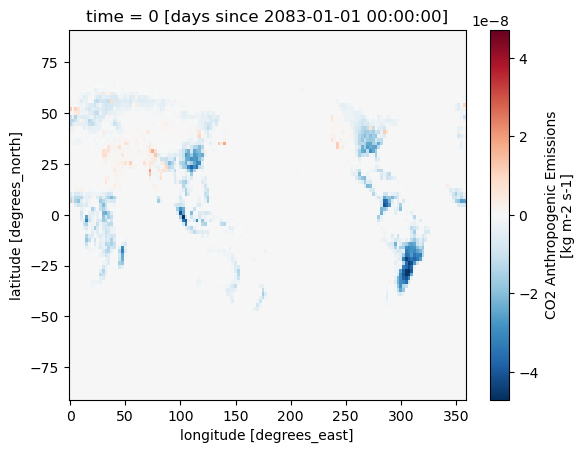

In [9]:

files2 =["/cluster/work/users/a2021/input/BECCSy/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_2083_1.9x2.5_remap_c20231005.nc"]
dset_case2 = xr.open_dataset(files2[0], decode_times=False)

dset_case2.CO2_flux.sel(time=0).plot()


In [9]:
list_files2 = ["/cluster/shared/noresm/inputdata/atm/cam/ggas/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c20220809.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
def_time_bnds = dset_case2['time_bnds'].copy()
#variable = ' CO2_flux' #"CO2 Anthropogenic Emissions
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
values_2080=dset_case2['CO2_flux'].sel(time='2080')
values_2060=dset_case2['CO2_flux'].sel(time='2060')
values_2040=dset_case2['CO2_flux'].sel(time='2040')
values_2020=dset_case2['CO2_flux'].sel(time='2020')
print(values_2080.sum())
print(values_2060.sum())
print(values_2040.sum())
print(values_2020.sum())
def_time_bnds
values_2080

<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(9.004049e-05, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(0.00051622, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(0.00032168, dtype=float32)


<xarray.DataArray 'CO2_flux' (time: 12, lat: 96, lon: 144)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [6.131300e-11, 3.353076e-11, ..., 0.000000e+00, 2.766737e-11],
        [1.347479e-09, 1.782505e-09, ..., 0.000000e+00, 5.419768e-11]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [6.109026e-11, 3.353076e-11, ..., 0.000000e+00, 2.744463e-11],
        [1.347479e-09, 1.782505e-09, ..., 0.000000e+00, 5.419768e-11]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [6.185585e-11, 3.353076e-11, ..., 0.000000e+00, 2.821023e-11],
        [1.347479e-09, 1.782505e-09, ..., 0.000000e+00, 5.419768e-11]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [6.177049e-11, 3.353076e-11, ..., 0.000000e+00, 2.812486e-11],
        [1.347479e-09, 1.782505e-09, ..., 0.000000e+00, 5.419768e-11]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2080-01-01 2080-02-01 ... 2080-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     CO2 Anthropogenic Emissions
    units:         kg m-2 s-1
    cell_methods:  time: mean

In [4]:
dset_case2

<xarray.Dataset>
Dimensions:    (time: 1056, bound: 2, lon: 144, lat: 96)
Coordinates:
  * time       (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2101-12-01
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: bound
Data variables:
    time_bnds  (time, bound) float64 ...
    CO2_flux   (time, lat, lon) float32 ...
    date       (time) int32 ...
Attributes:
    CDI:             Climate Data Interface version 1.9.10 (https://mpimet.mp...
    Conventions:     CF-1.6
    data_title:      Annual Anthropogenic Emissions of CO2 prepared for input...
    data_summary:    conservatively regridded from input4MIPs files listed in...
    source_files:    CO2-em-anthro_input4MIPs_emissions_CMIP_CEDS-2017-05-18_...
    data_creator:    Keith Lindsay (klindsay@ucar.edu)
    creation_date:   20181011
    data_script:     regrid_CO2-em-anthro.ncl
    data_reference:  Hoesly, R. M., Smith, S. J., Feng, L., Klimont, Z., Jans...
    history:         Fri Jul  1 13:57:32 2022: ncap2 -O -s defdim("bound",2);...
    CDO:             Climate Data Operators version 1.9.10 (https://mpimet.mp...
    NCO:             netCDF Operators version 5.0.3 (Homepage = http://nco.sf...

## Dont run;; only to test the new netcdf file 

In [6]:
list_files2 = ["/cluster/projects/nn9576k/anusha/DATA/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c21092023_2040for2080.nc"]

dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
#variable = ' CO2_flux' #"CO2 Anthropogenic Emissions
start_date = '2014-01-01'
end_date   = '2101-12-31'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
dset_case2
values_2080=dset_case2['CO2_flux'].sel(time='2080')
print(values_2080.sum())

<xarray.DataArray 'CO2_flux' ()>
array(0.00051622, dtype=float32)


In [100]:
values_2060=dset_case2['CO2_flux'].sel(time='2060')    #kg m-2 s-1
values_2080=dset_case2['CO2_flux'].sel(time='2080')
values_2040=dset_case2['CO2_flux'].sel(time='2040')
print(values_2060.sum())
print(values_2080.sum())
#values_2080 = values_2040.copy()
print(values_2080.sum())

<xarray.DataArray 'CO2_flux' ()>
array(9.004049e-05, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)
<xarray.DataArray 'CO2_flux' ()>
array(-0.00011706, dtype=float32)


In [101]:
dset_case2['CO2_flux'].loc[{'time': '2080'}]=values_2060.values
print(dset_case2['CO2_flux'].sel(time='2080').sum())
#print(dset_case2.time_bnds.time.values)
#dset_case2['time_bnds'] = def_time_bnds.copy()
#dset_case2.time_bnds.values = def_time_bnds.values.copy()


<xarray.DataArray 'CO2_flux' ()>
array(9.004049e-05, dtype=float32)


In [89]:
#def_time_bnds.values

In [88]:
#def_time_bnds.time.values.copy()

In [87]:
#print(dset_case2.time_bnds.time.values)
#def_time_bnds.time.values
#dset_case2.time_bnds.values = def_time_bnds.values.copy()

In [86]:
#dset_case2.time_bnds.values

In [94]:
dset_case2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c21092023_2060for2080.nc')
#dset_case2.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/emissions-cmip6_CO2_anthro_surface_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp534_201401-210112_fv_1.9x2.5_c22092023_2040for2080.nc')

In [56]:
values_2060=dset_case2['CO2_flux'].sel(time='2060')    #kg m-2 s-1
values_2080=dset_case2['CO2_flux'].sel(time='2080')
#print(values_2060.sum())
dset_case2['CO2_flux'].loc[{'time': '2080'}] = values_2060
values_2060_units= values_2060.sum(['time'])*(86400*(365/12))*(1e-12)*(dset['AREA']*(1e6))
#print(values_2080.sum())
#sum=dset_case2['CO2_flux'].sel(time='2060').sum()
print(values_2060_units.sum())
print(dset['AREA'])

print(dset_case2['CO2_flux'].sel(time='2060').sum(['time'])*(86400*(365/12))*(1e-12)*(dset['AREA']*(1e6)))


<xarray.DataArray ()>
array(-15.9853011)
<xarray.DataArray 'AREA' (lat: 96, lon: 144)>
array([[ 242.034618,  242.034618,  242.034618, ...,  242.034618,  242.034618,
         242.034618],
       [1935.881078, 1935.881078, 1935.881078, ..., 1935.881078, 1935.881078,
        1935.881078],
       [3869.651327, 3869.651327, 3869.651327, ..., 3869.651327, 3869.651327,
        3869.651327],
       ...,
       [3869.651327, 3869.651327, 3869.651327, ..., 3869.651327, 3869.651327,
        3869.651327],
       [1935.881078, 1935.881078, 1935.881078, ..., 1935.881078, 1935.881078,
        1935.881078],
       [ 242.034618,  242.034618,  242.034618, ...,  242.034618,  242.034618,
         242.034618]])
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  area
    units:      km^2


##Spatial plots of Co2 emission flux

Text(0.5, 1.0, 'CO2 Anthropogenic Emissions-ssp534- 2100')

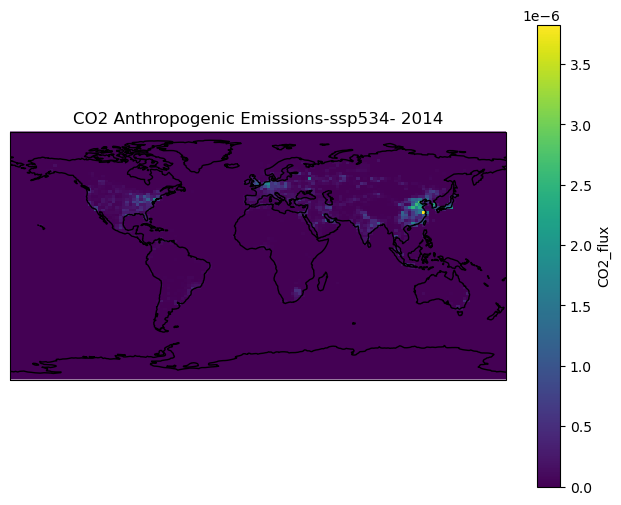

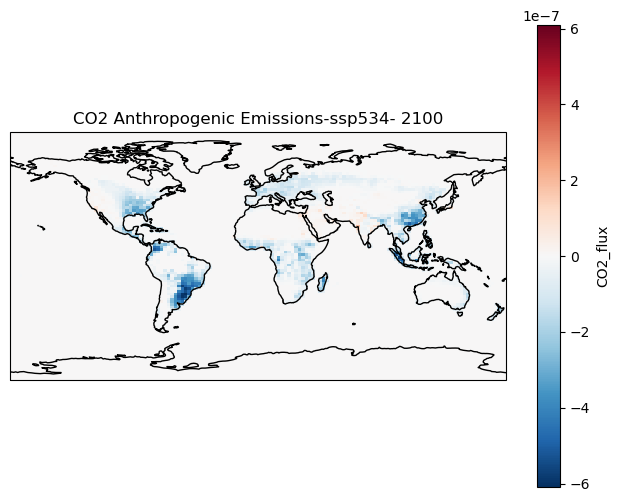

In [114]:
#times = xr.cftime_range(start=start_date, end=end_date, freq='MS')
#dset_case2 = dset_case2.assign_coords(time=times)

fig, axs = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2['CO2_flux'].sel(time='2014').sum('time').plot()
plt.title('CO2 Anthropogenic Emissions-ssp534- 2014')
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2['CO2_flux'].sel(time='2100').sum('time').plot()
axs.coastlines(linewidth=1)
plt.title('CO2 Anthropogenic Emissions-ssp534- 2100')
#dset_case2['CO2_flux'].sel(time='2014').sum('time')

## Monthly and Annual Time-series of CO2 Anthropogenic Emissions-ssp534

In [2]:

#fig, axs = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2 = dset_case2.assign_coords(time=monthly_dates)
a=dset_case2['CO2_flux'].sum(['lat','lon'])

plt.plot(dset_case2.time,dset_case2['CO2_flux'].sum(['lat','lon']))
dset_case2.time
plt.xlabel('Time')
plt.ylabel('CO2 Flux (kg m-2 s-1)')
plt.title('Time Series of CO2 Anthropogenic Emissions-ssp534')
plt.show()

##Annual emissions
annual_emissions = dset_case2['CO2_flux'].resample(time='A').sum()
start_date = '2014-01-01'
end_date   = '2101-12-31'
Annual_dates = pd.date_range(start=start_date, end=end_date, freq='A')
plt.plot(Annual_dates, annual_emissions.sum(['lat','lon']))
plt.xlabel('Time')
plt.ylabel('CO2 Flux (kg m-2 s-1)')
plt.title('Time Series of CO2 Anthropogenic Emissions-ssp534')
plt.show()



NameError: name 'dset_case2' is not defined